## Problem 2: Points to map (6 points)
 
The problem 2 this week continues the process that we started last week in Exercise 1, i.e. creating geometric point -objects and putting them into a map. 

**In this problem, our aim is to plot a map based on a set of x and y coordinates that are stored in a csv file.** 
The coordinates are in WGS84 decimal degrees, and the data is stored in `some_posts.csv` comma separated file in the folder `data`. First rows of the data look like this:
 
```
lat,lon,timestamp,userid
-24.980792492,31.484633302,2015-07-07 03:02,66487960
-25.499224667,31.508905612,2015-07-07 03:18,65281761
-24.342578456,30.930866066,2015-03-07 03:38,90916112
-24.85461393,31.519718439,2015-10-07 05:04,37959089
```

The data has 81379 rows and consists of locations and times of social media posts inside Kruger national park in South Africa:

| Column | Description |
|--------|-------------|
| lat | y-coordinate of the post |
| lon | x-coordinate of the post |
| timestamp | Time when the post was uploaded |
| userid | userid |

*Note: although the data is based on real social media data, it is heavily anonymized. Userids and timestamps have been randomized, i.e. they do not not match with real ones, also spatial accuracy of the data have been lowered.*

**First:**

- Import the needed modules
- Read the data from `data/some_posts.csv` into a Pandas dataframe called `data`
- Create an empty column called `geometry` where you will store shapely Point objects
- Insert Point objects into the column `geometry` based on the coordinate columns 
    - You might want to iterate over the dataframe rows, and use `.loc` indexer to update value of the correct column in each row. [See more tips from this week's course materials](https://automating-gis-processes.github.io/2018/docs/lessons/L2/geopandas-basics.html#creating-geometries-into-a-geodataframe)
    - *Note: if this step is taking a long time to run, you can first try out your code with a subset of the original data, eg. taking the first 50 rows of data `data[:50]`. Once the code works correctly, you can then run the process for the whole dataframe.*
    - Optional: you can also try to solve this problem using ``pandas.DataFrame.apply`` or the ``zip()`` -function (these approaches will be much faster than using a ``for``-loop and ``.iterrows()``.









In [1]:
import geopandas as gpd
import pandas as pd
import pycrs
from shapely.geometry import Point, Polygon


fp = "data/some_posts.csv"
data = pd.read_csv(fp)

In [2]:
# Check the dataframe head
print(data.head())


         lat        lon         timestamp    userid
0 -24.980792  31.484633  2015-07-07 03:02  66487960
1 -25.499225  31.508906  2015-07-07 03:18  65281761
2 -24.342578  30.930866  2015-03-07 03:38  90916112
3 -24.854614  31.519718  2015-10-07 05:04  37959089
4 -24.921069  31.520836  2015-10-07 05:19  27793716


In [3]:
data['lat'][0]

-24.980792492

**Next:**
- Convert that DataFrame into a GeoDataFrame, [See hints](https://automating-gis-processes.github.io/2018/lessons/L2/exercise-2.html)

- Update the CRS for coordinate system as WGS84 (i.e. epsg code: 4326)

- Save the data into a Shapefile called `Kruger_posts.shp`



In [39]:
coordinates = []
    
for i in range(len(data)):
    point = Point(data['lon'][i], data['lat'][i])
    coordinates.append((point))
    


data['geometry'] = coordinates

<class 'pandas.core.series.Series'>
POINT (30.983844086 -25.498371054)


In [40]:
#- Converting into a GeoDataFrame
geo = gpd.GeoDataFrame(data, geometry='geometry', crs={'init': 'epsg:4326'})

In [41]:
# Check the geodataframe head
print(geo.head())


         lat        lon         timestamp    userid  \
0 -24.980792  31.484633  2015-07-07 03:02  66487960   
1 -25.499225  31.508906  2015-07-07 03:18  65281761   
2 -24.342578  30.930866  2015-03-07 03:38  90916112   
3 -24.854614  31.519718  2015-10-07 05:04  37959089   
4 -24.921069  31.520836  2015-10-07 05:19  27793716   

                             geometry  
0  POINT (31.484633302 -24.980792492)  
1  POINT (31.508905612 -25.499224667)  
2  POINT (30.930866066 -24.342578456)  
3   POINT (31.519718439 -24.85461393)  
4  POINT (31.520835558 -24.921068894)  


In [45]:
outfp = 'Kruger_posts.shp'
geo.to_file(outfp)

data = gpd.read_file(outfp)

**Finally:** 
- Create a simple map of the points (one of these is enough):
    - Create the map using a the `.plot()` -function in Python. You might need to use the `matplotlib pyplot` `show()` method to display the image within this notebook. 
    - Create the map in a gis-software and upload the map as a png image to this repository (if you do this, remember to add a link to the image file to this notebook!)


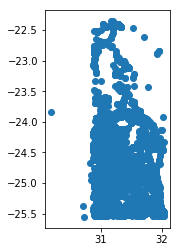

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt


data.plot()

Well done! Now you can move on to [Exercise-2-problem-3.ipynb](Exercise-2-problem-3.ipynb)